In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

sns.set_style('ticks')

In [19]:
dynData = loadmat('./Data/Dynamcs.mat')

cir_on = dynData['cir_on']
cir_off = dynData['cir_off']
tspan = dynData['tspan'].flatten() / 24

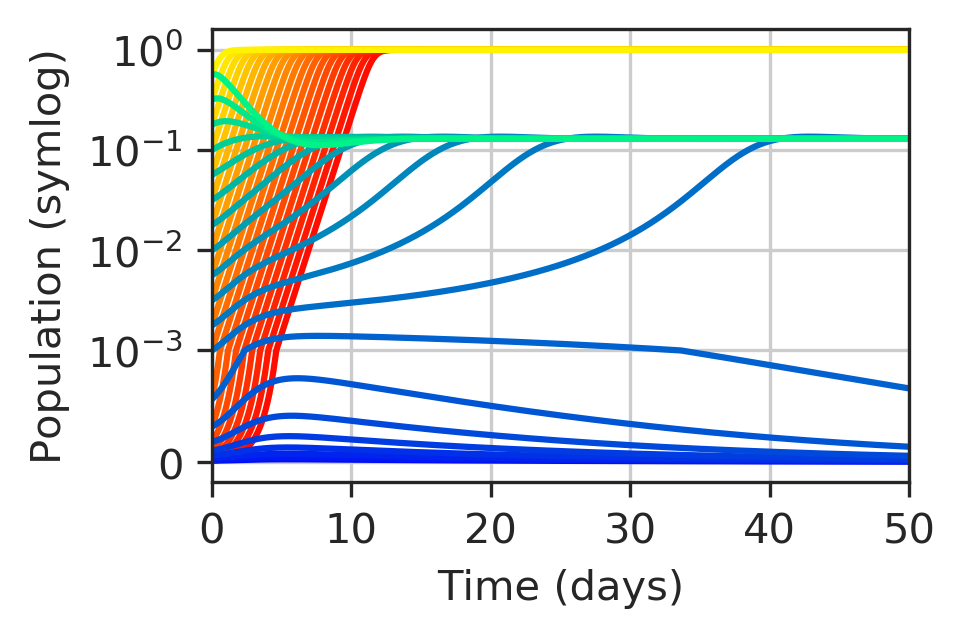

In [20]:
traceN = cir_on.shape[1]
bPalette = sns.color_palette('winter', traceN)
rPalette = sns.color_palette('autumn', traceN)


fig, ax = plt.subplots(figsize=[3, 2])
fig.dpi = 300

for idx in range(traceN):
    ax.plot(tspan, cir_off[:, idx], color=rPalette[idx])
    ax.plot(tspan, cir_on[:, idx], color=bPalette[idx])

ax.set_yscale('symlog', linthreshy=0.001)
ax.set_xlim([0, 50])
ax.set_ylabel('Population (symlog)')
ax.set_xlabel('Time (days)')
ax.grid(True, which='both')

fig.savefig('./ExportedFigs/Dynmaics.svg')

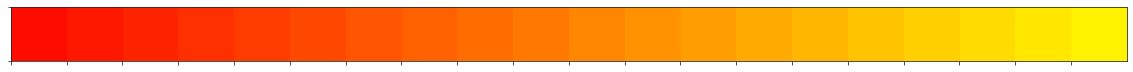

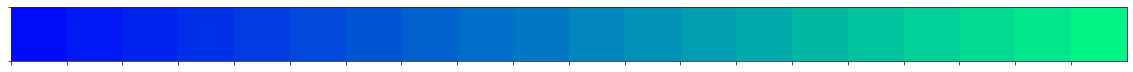

In [21]:
sns.palplot(rPalette)
plt.savefig('./ExportedFigs/DynLgd1.svg')
sns.palplot(bPalette)   
plt.savefig('./ExportedFigs/DynLgd2.svg')

In [47]:
dynData_mut1 = loadmat('./Data/Dynamcs_mut1.mat')
dynData_mut2 = loadmat('./Data/Dynamcs_mut2.mat')

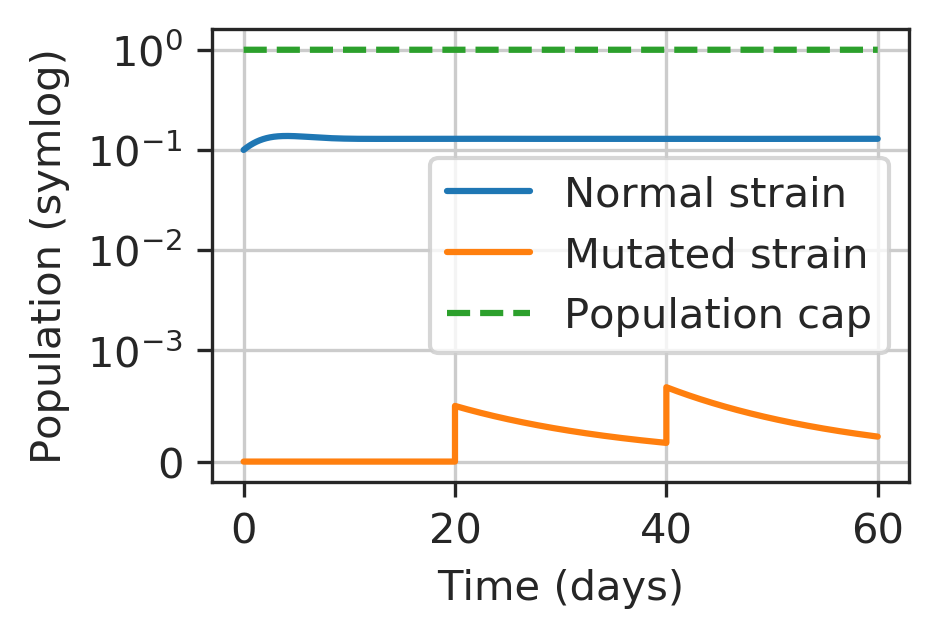

In [48]:
t_mut1 = dynData_mut1['t_all']
p_mut1 = dynData_mut1['f_all']

fig, ax = plt.subplots(figsize=[3, 2])
fig.dpi = 300

ax.plot(t_mut1 / 24, p_mut1[:, 1], label='Normal strain')
ax.plot(t_mut1 / 24, p_mut1[:, 2], label='Mutated strain')
ax.plot(t_mut1 / 24, [1] * len(t_mut1), '--', label='Population cap')

ax.set_yscale('symlog', linthreshy=0.001)
# ax.set_xlim([0, 50])
ax.set_ylabel('Population (symlog)')
ax.set_xlabel('Time (days)')
ax.grid(True, which='both')
ax.legend()

fig.savefig('./ExportedFigs/Dynmaics_mut1.svg')

In [49]:
p_mut1[999:1001]

array([[1.86721624e+01, 1.29462063e-01, 0.00000000e+00],
       [1.86721624e+01, 1.29462063e-01, 5.00000000e-04]])

In [50]:
t_mut1[1000]

array([480.])

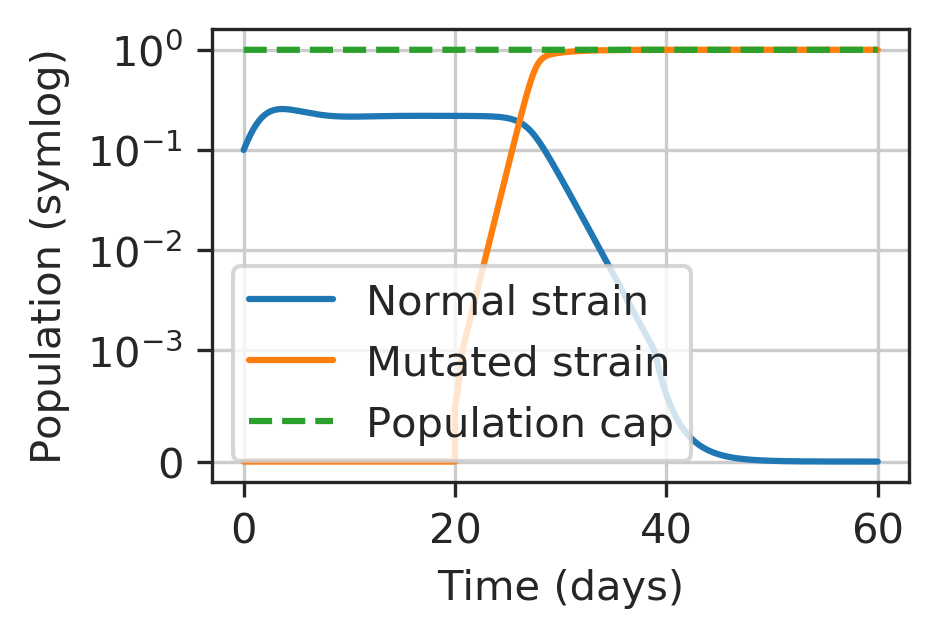

In [51]:
t_mut2 = dynData_mut2['t_all']
p_mut2 = dynData_mut2['f_all']

fig, ax = plt.subplots(figsize=[3, 2])
fig.dpi = 300

ax.plot(t_mut2 / 24, p_mut2[:, 1], label='Normal strain')
ax.plot(t_mut2 / 24, p_mut2[:, 2], label='Mutated strain')
ax.plot(t_mut2 / 24, [1] * len(t_mut2), '--', label='Population cap')

ax.set_yscale('symlog', linthreshy=0.001)
# ax.set_xlim([0, 50])
ax.set_ylabel('Population (symlog)')
ax.set_xlabel('Time (days)')
ax.grid(True, which='both')
ax.legend()

fig.savefig('./ExportedFigs/Dynmaics_mut2.svg')